In [1]:
%load_ext watermark


In [2]:
import itertools as it

from IPython.display import display
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp

from pylib.viz._get_nben_cmap import get_nben_cmap
from pylib.viz._get_nben_hue_norm import get_nben_hue_norm
from pylib.viz._size_fixation_areaplot import size_fixation_areaplot
from pylib.viz._size_fixation_cliffplot import size_fixation_cliffplot
from pylib.viz._size_fixation_heatmap import size_fixation_heatmap


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-09-30T06:12:57.024274+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1031-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

pandas : 2.2.3
seaborn: 0.13.2
teeplot: 1.2.0
polars : 1.9.0
numpy  : 2.1.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "wse-5050-spatial2d-explicitsite-traits"
teeplot_subdir


'wse-5050-spatial2d-explicitsite-traits'

## Prep Data


In [5]:
dfxs = pd.read_parquet("https://osf.io/x6uvs/download")
display(dfxs.describe()), display(dfxs.head()), display(dfxs.tail());


,group,trait value,replicate,population size,available beneficial mutations,fixation probability
count,7.174548e+06,7174656.0,7.174656e+06,7.174656e+06,7.174656e+06,7174656.0
mean,2.452487e+05,0.5,7.102234e+18,6.286069e+03,8.333333e+00,0.5
std,1.567677e+05,0.5,5.378051e+18,9.114411e+05,1.011050e+01,0.5
min,0.000000e+00,0.0,1.377883e+17,2.560000e+02,1.000000e+00,0.0
25%,1.065180e+05,0.0,8.174028e+17,2.560000e+02,2.000000e+00,0.0
50%,2.325010e+05,0.5,8.033490e+18,2.560000e+02,3.500000e+00,0.5
75%,3.819710e+05,1.0,1.177183e+19,2.560000e+02,1.000000e+01,1.0
max,5.314400e+05,1.0,1.789866e+19,1.908480e+08,3.000000e+01,1.0


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
0,455040.0,0,817402822517165734,256,2,1.0,normomutator
1,245685.0,0,817402822517165734,256,2,1.0,normomutator
2,446144.0,1,817402822517165734,256,2,1.0,hypermutator
3,407622.0,1,817402822517165734,256,2,1.0,hypermutator
4,319580.0,0,817402822517165734,256,2,0.0,normomutator


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
7174651,NaN,0,6090965044719847586,190848000,10,0.0,normomutator
7174652,NaN,1,12710092533823302741,190848000,30,1.0,hypermutator
7174653,NaN,0,12710092533823302741,190848000,30,0.0,normomutator
7174654,NaN,1,14083560063894963569,190848000,30,1.0,hypermutator
7174655,NaN,0,14083560063894963569,190848000,30,0.0,normomutator


In [6]:
apn = dfxs["population size"].min()  # agents per node
apn


np.uint64(256)

## Size Fixation Curves


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


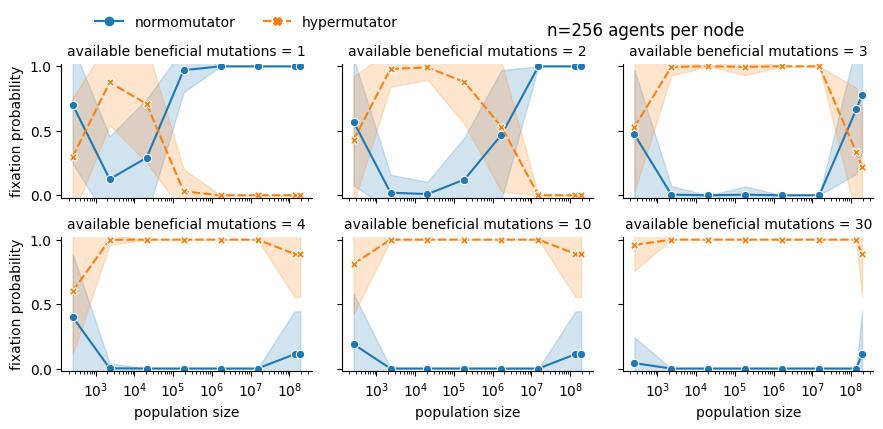

teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


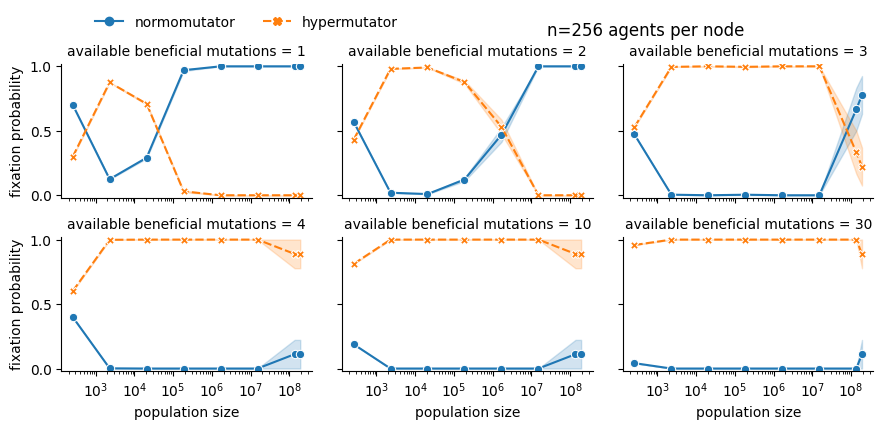

teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


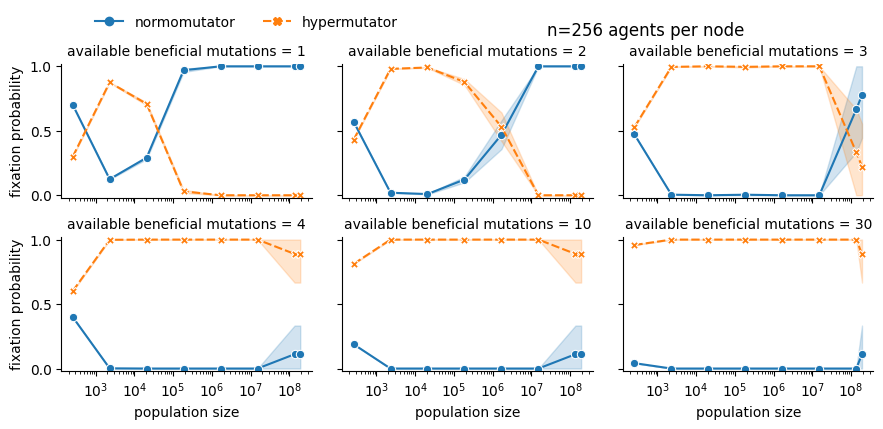

teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


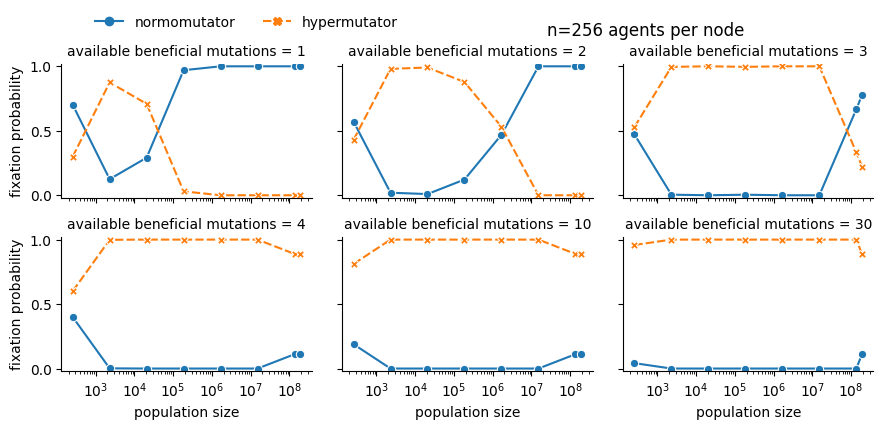

In [7]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs,
        x="population size",
        y="fixation probability",
        hue="genotype",
        hue_order=["normomutator", "hypermutator"],
        col="available beneficial mutations",
        style="genotype",
        style_order=["normomutator", "hypermutator"],
        aspect=1.5,
        col_wrap=3,
        errorbar=errorbar,
        height=2,
        kind="line",
        markers=True,
        seed=1,
        teeplot_outexclude="post",
        teeplot_subdir=teeplot_subdir,
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template="{{col_var}} = {{col_name:.0f}}")
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    )


teeplots/wse-5050-spatial2d-explicitsite-traits/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


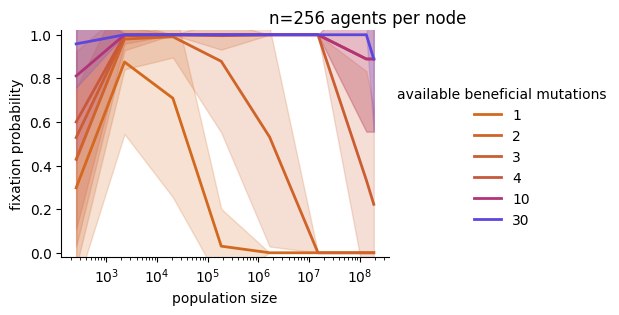

teeplots/wse-5050-spatial2d-explicitsite-traits/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


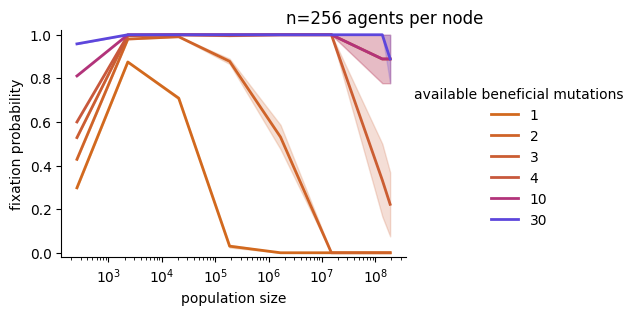

teeplots/wse-5050-spatial2d-explicitsite-traits/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


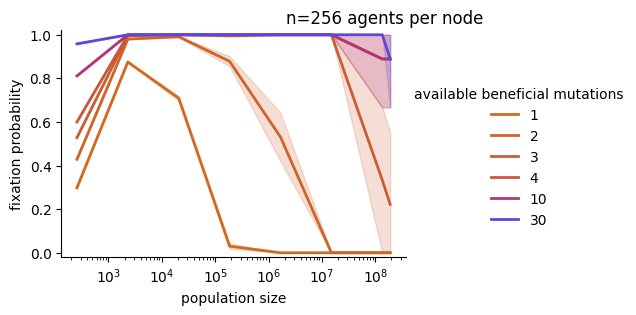

teeplots/wse-5050-spatial2d-explicitsite-traits/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


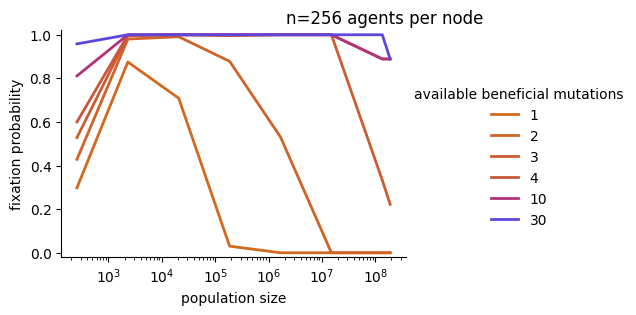

In [8]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs[dfxs["genotype"] == "hypermutator"],
        x="population size",
        y="fixation probability",
        hue="available beneficial mutations",
        aspect=1.5,
        height=3,
        kind="line",
        errorbar=errorbar,
        linewidth=2,
        markers=True,
        palette=get_nben_cmap(),
        hue_norm=get_nben_hue_norm(),
        seed=1,
        teeplot_outexclude="post",
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
""",
        teeplot_subdir=teeplot_subdir,
    )


## Size Fixation Cliffplot


In [9]:
dfxs["available\nbeneficial mutations"] = dfxs[
    "available beneficial mutations"
]


/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+errorbar=ci+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+errorbar=ci+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


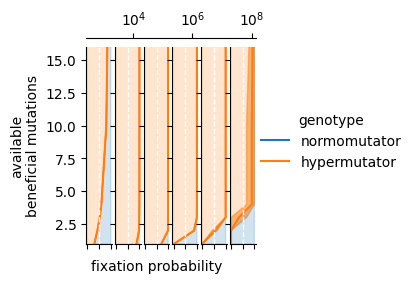

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+errorbar=ci+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+errorbar=ci+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


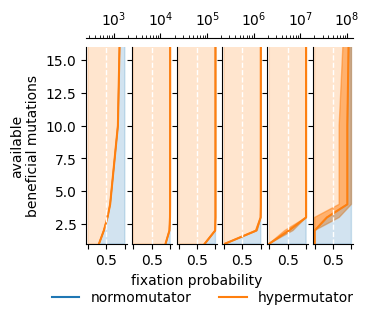

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


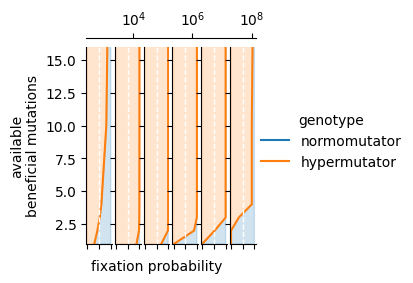

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+col-label=+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


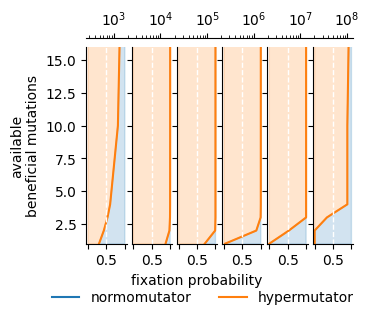

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+errorbar=ci+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+errorbar=ci+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


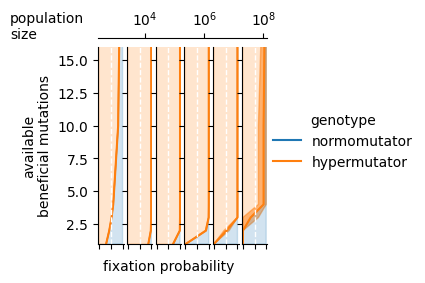

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+errorbar=ci+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+errorbar=ci+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


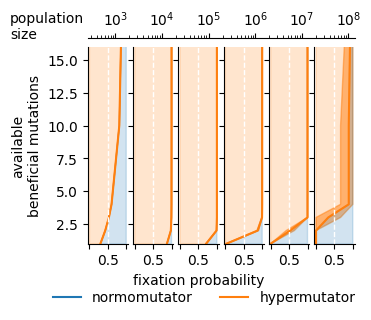

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+hue=genotype+layout=skinny+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


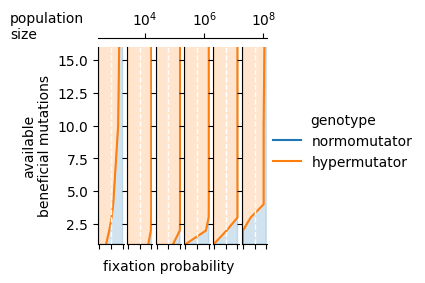

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:29: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=population-size+hue=genotype+layout=wide+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


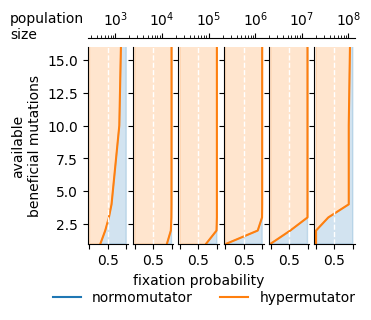

In [10]:
for col_label, errorbar, layout in it.product(
    ["", None],
    ["ci", None],
    ["skinny", "wide"],
):
    tp.tee(
        size_fixation_cliffplot,
        fixprobs_df=dfxs[
            # exclude non-9-scaled wafer-filling data
            np.isclose(
                np.mod(
                    np.log(dfxs["population size"] // apn) / np.log(9), 1.0
                ),
                0.0,
            )
        ].reset_index(drop=True),
        x="fixation probability",
        y="available\nbeneficial mutations",
        col="population size",
        hue="genotype",
        hue_order=["normomutator", "hypermutator"],
        col_label=col_label,
        errorbar=errorbar,
        layout=layout,
        ylim=(1, 16),
        teeplot_subdir=teeplot_subdir,
    )


## Size Fixation Areaplot


/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_areaplot.py:24: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.png


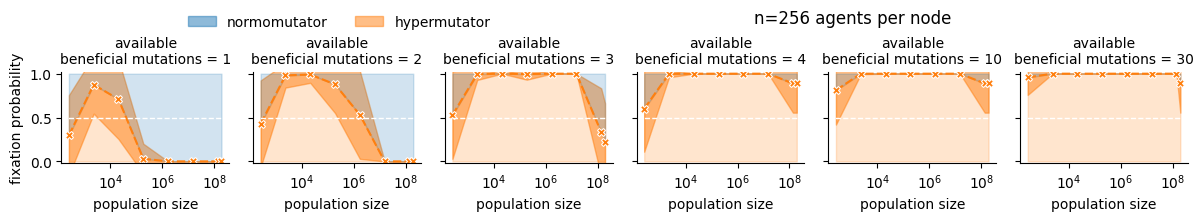

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_areaplot.py:24: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.png


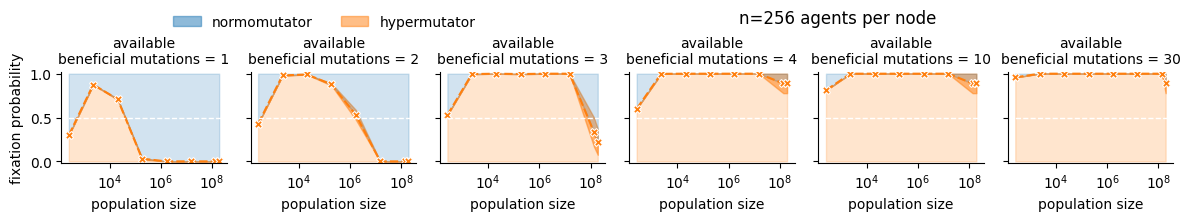

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_areaplot.py:24: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.png


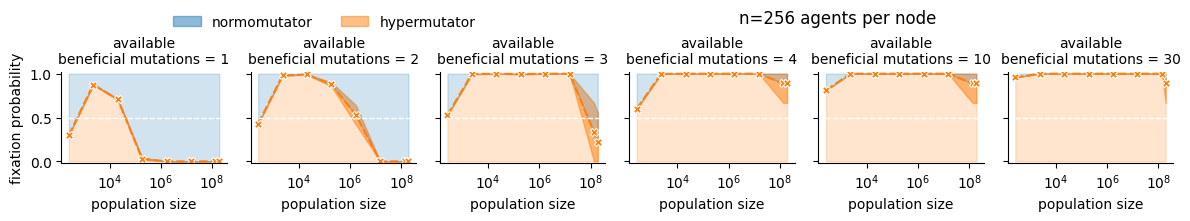

/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_areaplot.py:24: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.relplot(


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+style=genotype+viz=size-fixation-areaplot+x=population-size+y=fixation-probability+ext=.png


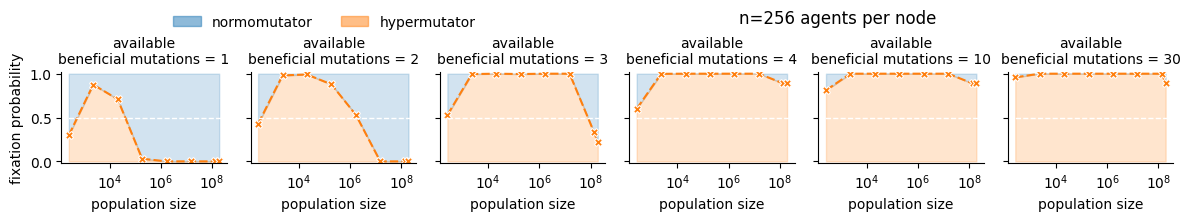

In [11]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        size_fixation_areaplot,
        fixprobs_df=dfxs,
        x="population size",
        y="fixation probability",
        hue="genotype",
        hue_order=["normomutator", "hypermutator"],
        col="available\nbeneficial mutations",
        style="genotype",
        style_order=["normomutator", "hypermutator"],
        errorbar=errorbar,
        height=2,
        markers=True,
        teeplot_outexclude="post",
        teeplot_subdir=teeplot_subdir,
        teeplot_postprocess=f"""
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.06)
teed.set_titles(col_template="{{col_var}} = {{col_name:.0f}}")
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.9),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    )


## Size Fixation Heatmap


teeplots/wse-5050-spatial2d-explicitsite-traits/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.png


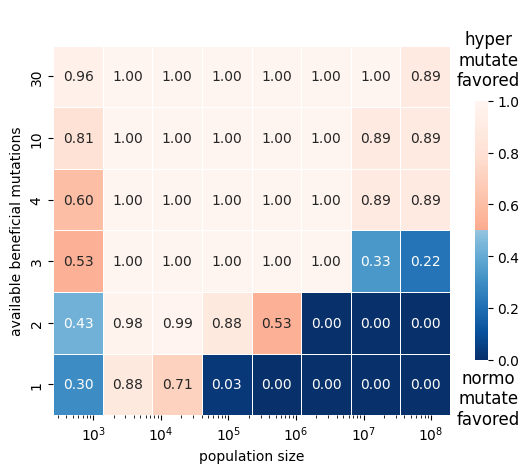

<Axes: ylabel='available beneficial mutations'>

In [12]:
tp.tee(
    size_fixation_heatmap,
    fixprobs_df=dfxs,
    genotype="hypermutator",
    index="available beneficial mutations",
    on="population size",
    values="fixation probability",
    teeplot_subdir=teeplot_subdir,
)


## Quality Check: Number Replicates Available


In [13]:
categories = (
    pl.DataFrame(dfxs)
    .group_by(
        "population size",
    )
    .first()["population size"]
    .sort()
    .cast(pl.String)
    .to_list()
)
categories


['256',
 '2304',
 '20736',
 '186624',
 '1679616',
 '15116544',
 '136048896',
 '190848000']

In [14]:
dfy = pl.DataFrame(dfxs).with_columns(
    pl.col("population size")
    .cast(pl.String)
    .cast(pl.Enum(categories))
    .alias("population size cat"),
)
display(dfy.describe()), display(dfy.head()), display(dfy.tail());


statistic,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,available beneficial mutations,population size cat
str,f64,f64,f64,f64,f64,f64,str,f64,str
"""count""",7.174548e6,7.174656e6,7.174656e6,7.174656e6,7.174656e6,7.174656e6,"""7174656""",7.174656e6,"""7174656"""
"""null_count""",108.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",245248.692779,0.5,7.1022e18,6286.069364,8.333333,0.5,null,8.333333,null
"""std""",156767.708242,0.5,5.3781e18,911441.115446,10.110501,0.5,null,10.110501,null
"""min""",0.0,0.0,1.3779e17,256.0,1.0,0.0,null,1.0,null
"""25%""",106518.0,0.0,8.1740e17,256.0,2.0,0.0,null,2.0,null
"""50%""",232501.0,1.0,8.0335e18,256.0,4.0,0.979719,null,4.0,null
"""75%""",381971.0,1.0,1.1772e19,256.0,10.0,1.0,null,10.0,null
"""max""",531440.0,1.0,1.7899e19,1.90848e8,30.0,1.0,null,30.0,null


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,available beneficial mutations,population size cat
f64,u8,u64,u64,i8,f64,cat,i8,enum
455040.0,0,817402822517165734,256,2,1.0,"""normomutator""",2,"""256"""
245685.0,0,817402822517165734,256,2,1.0,"""normomutator""",2,"""256"""
446144.0,1,817402822517165734,256,2,1.0,"""hypermutator""",2,"""256"""
407622.0,1,817402822517165734,256,2,1.0,"""hypermutator""",2,"""256"""
319580.0,0,817402822517165734,256,2,0.0,"""normomutator""",2,"""256"""


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,available beneficial mutations,population size cat
f64,u8,u64,u64,i8,f64,cat,i8,enum
null,0,6090965044719847586,190848000,10,0.0,"""normomutator""",10,"""190848000"""
null,1,12710092533823302741,190848000,30,1.0,"""hypermutator""",30,"""190848000"""
null,0,12710092533823302741,190848000,30,0.0,"""normomutator""",30,"""190848000"""
null,1,14083560063894963569,190848000,30,1.0,"""hypermutator""",30,"""190848000"""
null,0,14083560063894963569,190848000,30,0.0,"""normomutator""",30,"""190848000"""


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.png


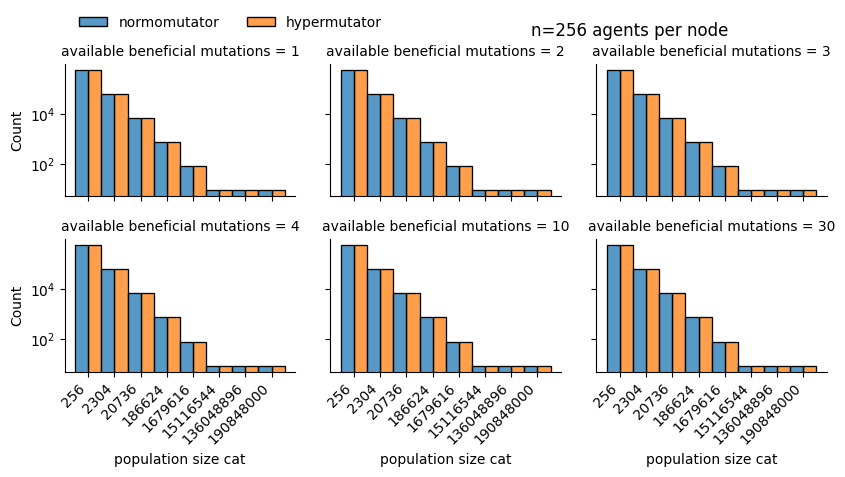

In [15]:
tp.tee(
    sns.displot,
    data=dfy.to_pandas(),
    x="population size cat",
    hue="genotype",
    hue_order=["normomutator", "hypermutator"],
    col="available beneficial mutations",
    aspect=1.5,
    col_wrap=3,
    height=2,
    kind="hist",
    multiple="dodge",
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(yscale='log')
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
for ax in teed.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
sns.move_legend(
    teed, "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    teeplot_subdir=teeplot_subdir,
)


## Quality Check: Has Reached Fixation?


In [16]:
dfxs_ = dfxs[dfxs["genotype"] == "hypermutator"].copy().reset_index(drop=True)


In [17]:
dfxs_["neither fixed"] = (dfxs_["fixation probability"] != 1.0) & (
    dfxs_["fixation probability"] != 0.0
)
any_unfixed = dfxs_["neither fixed"].any()
any_unfixed


np.True_

teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


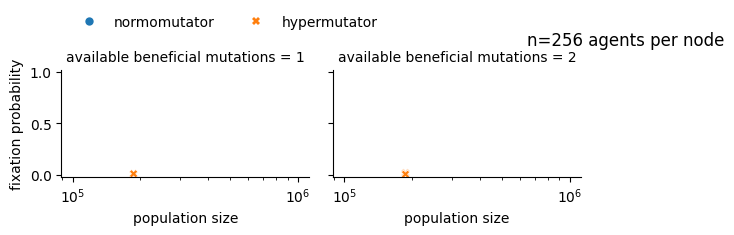

In [18]:
tp.tee(
    sns.relplot,
    data=dfxs_[dfxs_["neither fixed"]],
    x="population size",
    y="fixation probability",
    hue="genotype",
    hue_order=["normomutator", "hypermutator"],
    col=[None, "available beneficial mutations"][int(any_unfixed)],
    style="genotype",
    style_order=["normomutator", "hypermutator"],
    aspect=1.5,
    col_wrap=[None, 3][int(any_unfixed)],
    height=2,
    kind="scatter",
    markers=bool(any_unfixed),
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(xscale='log', ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
try:
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.25, 0.97),
        frameon=False,
        ncol=2,
        title=None,
    )
except ValueError:
    pass
""",
    teeplot_subdir=teeplot_subdir,
)


teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=neither-fixed+multiple=fill+palette=pastel2+viz=displot+x=population-size+ext=.pdf
teeplots/wse-5050-spatial2d-explicitsite-traits/col=available-beneficial-mutations+hue=neither-fixed+multiple=fill+palette=pastel2+viz=displot+x=population-size+ext=.png


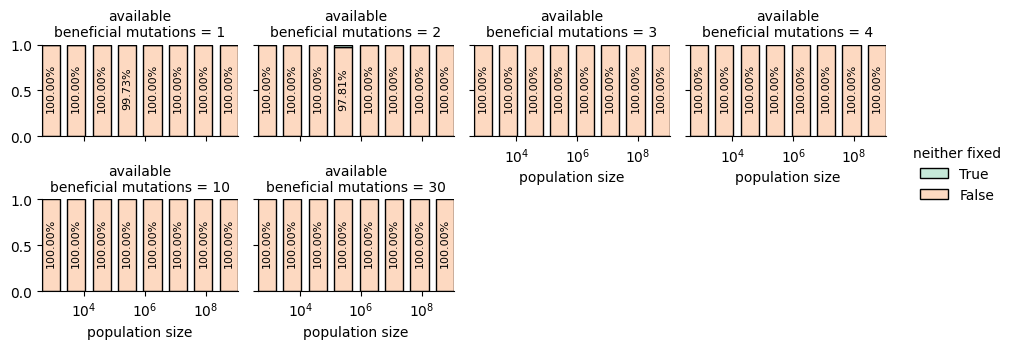

In [19]:
saveit, teed = tp.tee(
    sns.displot,
    data=dfxs_.replace(
        # top surveyed value is of 9x growth pattern,
        # so nudge it to prevent binning issues
        dfxs_["population size"].max(),
        sorted(dfxs_["population size"].unique())[-2] * 9,
    ).reset_index(drop=True),
    x="population size",
    hue="neither fixed",
    hue_order=[True, False],
    col="available\nbeneficial mutations",
    col_wrap=4,
    aspect=1.3,
    height=1.8,
    multiple="fill",
    bins=dfxs_["population size"].nunique(),
    log_scale=(True, False),
    shrink=0.8,
    palette="Pastel2",
    teeplot_callback=True,
    teeplot_subdir=teeplot_subdir,
)

teed.set_titles(col_template="{col_var} = {col_name:.0f}")
teed.set_ylabels("")
# adapted from https://stackoverflow.com/a/68850867
for ax in teed.axes.ravel():
    # add annotations
    for c in ax.containers:
        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [
            f"{w * 100:0.2f}%" if (w := v.get_height()) > 0.5 else ""
            for v in c
        ]
        ax.bar_label(
            c,
            labels=labels,
            label_type="center",
            fontsize=8,
            rotation=90,
            padding=2
        )

saveit()
